<a href="https://colab.research.google.com/github/teruyuki-yamasaki/Sounds/blob/main/musicnotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

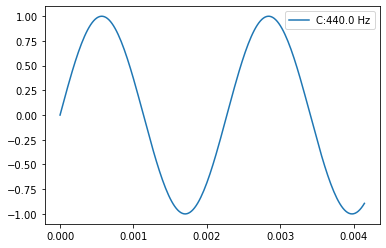

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import IPython

rate=48000
duration:float=1.0
C_freq = 440.0 

def make_note(freq:float=440.0, duration:float=1.0, rate:int=48000):
    t = np.linspace(0., duration, int(rate*duration))
    x = np.sin(2.0 * np.pi * freq * t)
    return x    

C = make_note(C_freq) 

t0 = 0; tf = 200
t = np.linspace(0., duration, int(rate*duration))
plt.plot(t[t0:tf],C[t0:tf], label=f'C:{C_freq} Hz')
plt.legend() 
plt.show()

IPython.display.Audio(C, rate=rate, autoplay=True)

In [2]:
res = [] 
for i in range(13):
    res.append(make_note(C_freq * 2 ** (i/12)))
octave = np.concatenate(res,0) 
IPython.display.Audio(octave, rate=rate, autoplay=True)

In [3]:
octave_name = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'] 
octave_freq = [C_freq * 2 ** (i/12) for i in range(12)] 
oto = dict({name: freq for name, freq in zip(octave_name, octave_freq)}) 
oto['O'] = 0. 

def name2freq(name:str):
    if name in oto.keys(): 
        return oto[name]

    else:
        l_or_h = name[-2]
        o = int(name[-1]) 
        key = name[:-2]
        sign = -1 if l_or_h=='l' else 1 
        return oto[key] * 2 ** (o * sign)

def freq2array(freq:float=440.0, duration:float=1.0, rate:int=48000):
    t = np.linspace(0., duration, int(rate*duration))
    x = np.sin(2.0 * np.pi * freq * t)
    return x    

def play(notes:list):
    print(notes)
    res = [] 
    for name in notes:
        freq = name2freq(name)
        array = freq2array(freq)
        res.append(array)
    res = np.concatenate(res,0)
    return res 

In [6]:
notes = ['C', 'D', 'E', 'F', 'G', 'A', 'B'] 
res = play(notes) 
IPython.display.Audio(res, rate=rate, autoplay=True)

['C', 'D', 'E', 'F', 'G', 'A', 'B']


In [11]:
notes = ['C', 'D', 'E', 'F', 'G', 'A', 'B'] 
lower_notes = [name+'l1' for name in notes] 
higher_notes = [name+'h1' for name in notes] 
three_octaves = lower_notes+['O']+notes+['O']+higher_notes
res = play(three_octaves)
IPython.display.Audio(res, rate=rate, autoplay=True)

['Cl1', 'Dl1', 'El1', 'Fl1', 'Gl1', 'Al1', 'Bl1', 'O', 'C', 'D', 'E', 'F', 'G', 'A', 'B', 'O', 'Ch1', 'Dh1', 'Eh1', 'Fh1', 'Gh1', 'Ah1', 'Bh1']


In [12]:
#part1
melody = ['B'] 
melody += ['Eh1', 'Gh1', 'F#h1', 'Eh1', 'Bh1', 'Ah1', 'F#h1'] 
melody += ['Eh1', 'Gh1', 'F#h1', 'D#h1', 'Fh1', 'B', 'B', 'B', 'B']
res_melody = play(melody)

waon = ['O'] 
waon += ['E']*7
waon += ['E', 'E', 'E', 'D#', 'Bl1', 'E', 'G', 'B', 'Bl1']
res_waon = play(waon) 

res = res_melody + res_waon * 5
IPython.display.Audio(res, rate=rate, autoplay=True)

['B', 'Eh1', 'Gh1', 'F#h1', 'Eh1', 'Bh1', 'Ah1', 'F#h1', 'Eh1', 'Gh1', 'F#h1', 'D#h1', 'Fh1', 'B', 'B', 'B', 'B']
['O', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'D#', 'Bl1', 'E', 'G', 'B', 'Bl1']
